In [1]:
import sys
sys.path.insert(0, '../datasets/')
import numpy as np
import matplotlib.pyplot as plt

import posekernellifter
import dataset
import roomsetup
import darkrooms
import conference
import chris
%load_ext autoreload
%autoreload 2

/viscam/u/ycda/miniconda3/envs/realim/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
room = darkrooms.dr.room_setup
#room = conference.conference_room.room_setup
#room = chris.cr.room_setup

In [6]:
room.plot_room(c)

NameError: name 'c' is not defined

In [3]:
#PARAMETERS:
#name = "May31Real"
#name2 = "May31"
#name = "Jun3Real"
#name2 = "Jun3"
name = "May18Real"
name2 = "May18"
room = darkrooms.dr.room_setup
#room = conference.conference_room.room_setup
#room = chris.cr.room_setup

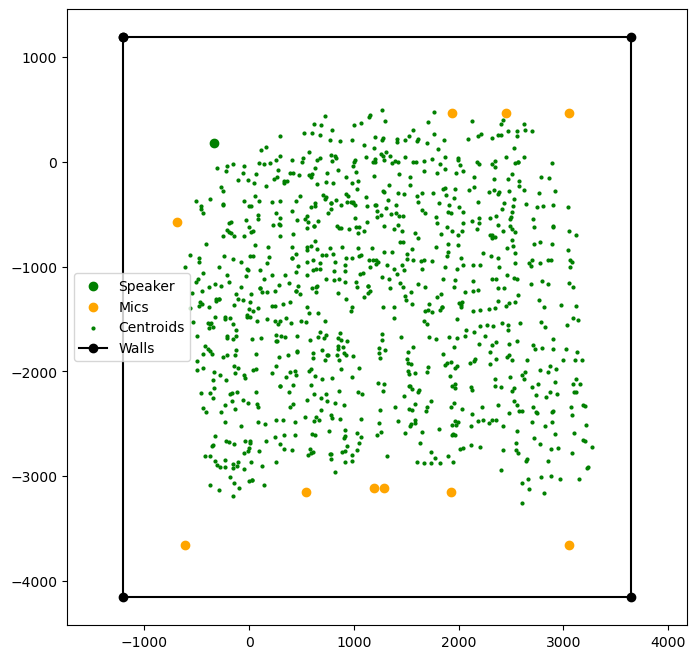

In [4]:
test_indices = np.load("/viscam/projects/soundcam/baseline_files/test_indices.npy")
c = np.load("/viscam/projects/soundcam/datasets/human_rgbd/"+name+"/preprocessed/centroid.npy")
room.plot_room(c)
c = c[test_indices, :]
pk_save_path = "/viscam/projects/soundcam/posekernels/" + name2 + "/ds_pose_kernels.npy"

In [5]:
pks = np.load(pk_save_path, mmap_mode='r')[:, :, :14000]

# PoseKernel Baseline

/sailhome/ycda/soundcam/scripts/baselines/posekernel/posekernellifter.py:137: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  results = np.array(results)
/sailhome/ycda/soundcam/scripts/baselines/posekernel/posekernellifter.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.array(results)


Error:
74.85708471505295
0
0


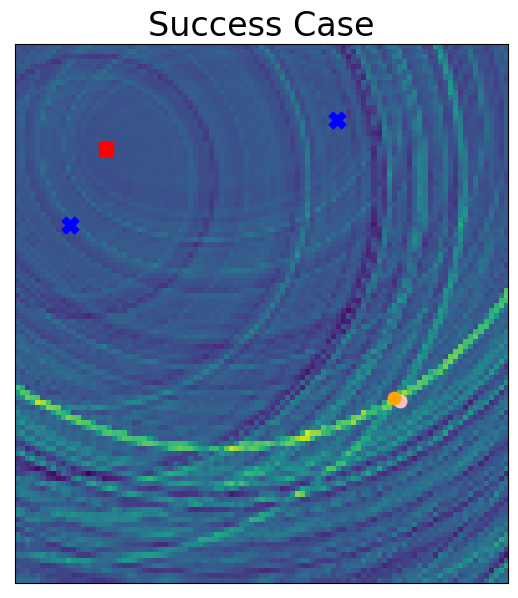

In [19]:
pkl = posekernellifter.PoseKernelLifter(room, int((room.x_max - room.x_min)/50), int((room.y_max - room.y_min)/50))
errors = pkl.inference(pks[71:72,[6, 7]], c[71:72], True, alpha=3.5, mic_indices = [6, 7])

/sailhome/ycda/soundcam/scripts/baselines/posekernel/posekernellifter.py:137: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  results = np.array(results)
/sailhome/ycda/soundcam/scripts/baselines/posekernel/posekernellifter.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.array(results)


Error:
4567.632140868832
0
0


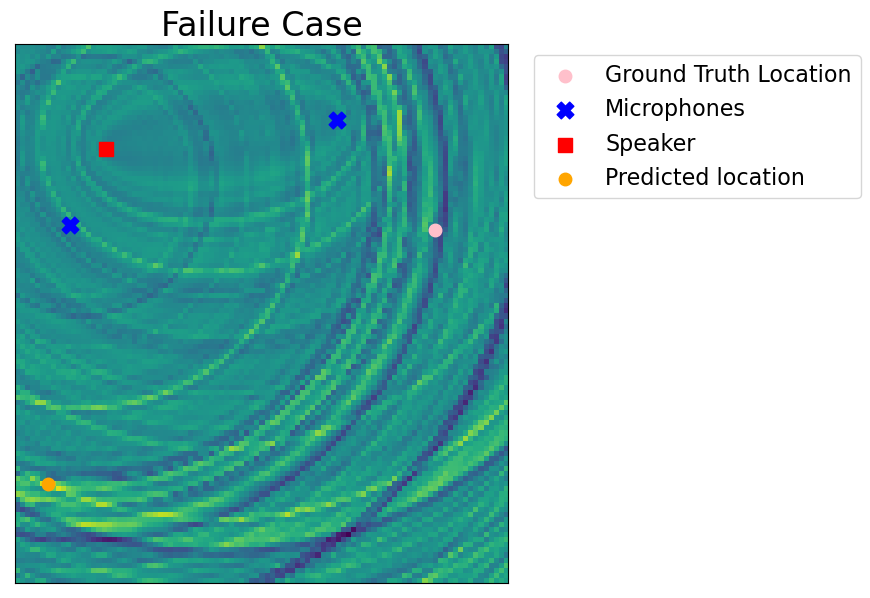

In [18]:
pkl = posekernellifter.PoseKernelLifter(room, int((room.x_max - room.x_min)/50), int((room.y_max - room.y_min)/50))
errors = pkl.inference(pks[80:81,[6, 7]], c[80:81], True, alpha=3.5, mic_indices = [6, 7],success=False)

In [41]:
ls = [1]

In [42]:
np.array(ls)

array([1])

In [12]:
print(np.mean(errors))
print(np.median(errors))
print(np.std(errors))


2299.1506972054067
1508.7587847070063
1902.8755817841825
